# The Office Scratchpad

In [1]:
# imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Acquire

In [ ]:
# functions to set data to be used in my visualizations 
def set_color(ratings):
    if ratings < 7.4:
        return 'red'
    elif (ratings >= 7.4) & (ratings < 8.2):
        return 'yellow'
    elif (ratings >= 8.2) & (ratings < 9.0):
        return 'lightgreen'
    elif (ratings >= 9.0):
        return 'darkgreen'

In [ ]:
def the_office():
    '''
    Function to read the office series csv file,
    and drop null values in the data,
    rename columns for readability,
    convert column names to lowercase
    and save the new df to a csv file
    '''
    # reading the office series data from a csv file
    df = pd.read_csv('the_office_series.csv')
    # dropping the GuestStars column, too many null values
    df = df.drop(columns='GuestStars')
    # renaming the columns for readability
    df = df.rename(columns={"Unnamed: 0": "Episode", "EpisodeTitle": "Episode_Title"})
    # convert column names to lowercase
    df.columns = [col.lower() for col in df]
    # adding a color column to the df
    df['color'] = df['ratings'].apply(set_color)
    # saving the office data to a csv
    df.to_csv('the_office.csv')
    
    return df

In [ ]:
# getting the office data using the office function 
df = the_office()
df.head()

In [ ]:
# reading the office series csv file
df = pd.read_csv('the_office_series.csv')
df.head() # check_yo_head

In [ ]:
df.info()

In [ ]:
# convert column names to lowercase, replace '.' in column names with '_'
df.columns = [col.lower().replace('.', '_') for col in df]

In [ ]:
df.head()

In [ ]:
# looking at the shape of the data
df.shape

In [ ]:
# looking at the data info
df.info()

In [ ]:
# checking for nulls in the data
df.isna().sum()

It looks like there are only nulls in the Gueststar column,
I think I will make a gueststar df and then drop it for the original df

In [ ]:
def guest_office():
    '''
    Function to create a df where there are guest stars on the episode,
    drop the null values in the data,
    rename columns for readability,
    convert column names to lowercase
    and save the df to a csv file 
    '''
    # reading the office series data from a csv file
    df = pd.read_csv('the_office_series.csv')
    # dropping the null values in the GuestStars column
    df = df[df.GuestStars.notna()]
    # renaming the columns for readability
    df = df.rename(columns={"Unnamed: 0": "Episode", "EpisodeTitle": "Episode_Title", "GuestStars": "Guest_Stars"})
    # convert column names to lowercase
    df.columns = [col.lower() for col in df]
    # adding a color column to the df
    df['color'] = df['ratings'].apply(set_color)
    # saving the office data to a csv
    df.to_csv('the_office_guest.csv')
    
    return df
    

In [ ]:
guest_df = guest_office()
guest_df.head()

In [ ]:
guest_df.shape

In [ ]:
df.head()

In [ ]:
df = df.drop(columns='GuestStars')

In [ ]:
df.head()

In [ ]:
df.tail()

In [ ]:
# convert column names to lowercase, replace '.' in column names with '_'
df = df.columns = [col.lower().replace('.', '_') for col in df]

In [ ]:
# looking at the episode with the most views
max_views = df.loc[df.viewership.idxmax()]
max_views

In [ ]:
# checking to see the most viewed episode on the guest df, looks like they are the same
guest_max = guest_df.loc[guest_df.viewership.idxmax()]
guest_max

In [ ]:
plt.scatter(df.episode, df.viewership)
plt.xlabel("Episode")
plt.ylabel("Viewership")
plt.title("Episode Popularity of The Office")

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
# functions to set data to be used in my visualizations 
def set_color(ratings):
    if ratings < 7.4:
        return 'red'
    elif (ratings >= 7.4) & (ratings < 8.2):
        return 'yellow'
    elif (ratings >= 8.2) & (ratings < 9.0):
        return 'lightgreen'
    elif (ratings >= 9.0):
        return 'darkgreen'

In [ ]:
# setting data required in visualizations
df['color'] = df['ratings'].apply(set_color)
df.head()

In [ ]:
plt.scatter(df.episode, df.ratings)
plt.xlabel("Episode")
plt.ylabel("Viewership")
plt.title("Episode Popularity of The Office")

In [ ]:
fig, ax = plt.subplots()

ax.scatter(x=df.index, 
           y=df.viewership,
           c=df.color,
          )
plt.xlabel("Episode")
plt.ylabel("Viewership")
plt.title("Episode Popularity of The Office")

In [ ]:
import plotly.express as px

# dataframe for average duration of each Season
avg_season = df.groupby(df.season)[['ratings']].mean().reset_index()

fig = px.scatter(avg_season, x = 'season', y = 'ratings',trendline = 'lowess',size = 'season',
                 title = '<b>Ratings over each Season</b>')
fig.show()

In [ ]:
import plotly.express as px
avg_season = df.groupby(df.season)[['ratings']].mean().reset_index()
fig = px.scatter(avg_season, x="season", y="ratings", color="ratings", marginal_y="violin",
           marginal_x="box", trendline="ols", template="simple_white", title = '<b>Ratings over each Season</b>')
fig.show()

In [ ]:
import plotly.express as px
fig = px.bar(x=["a", "b", "c"], y=[1, 3, 2])
fig.write_html('first_figure.html', auto_open=True)

In [ ]:
df_episodes = df.groupby('season').size().reset_index(name='episodes')
df_episodes

In [ ]:
def season_episodes():
    '''
    function that takes the office df and 
    makes a new df with the season and 
    number of episodes per season
    '''
    # getting the office data
    df = the_office()
    # creating a new df with seasons and episodes
    df_episodes = df.groupby('season').size().reset_index(name='episodes')
    
    return df_episodes

In [ ]:
season_episodes()

# Setting up for Clustering

In [16]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np

# Exploring
import scipy.stats as stats

# Visualizing
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# default pandas decimal number display format
pd.options.display.float_format = '{:20,.2f}'.format

from wrangle import the_office

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Statistical Tests
import scipy.stats as stats

# Visualizing
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from sklearn.model_selection import learning_curve

pd.options.display.float_format = '{:20,.2f}'.format


In [5]:
# getting the office data again
df = the_office()

In [6]:
df.head() # check_yo_head

,episode,season,episode_title,about,ratings,votes,viewership,duration,date,director,writers,color
0,0,1,Pilot,The premiere episode introduces the boss and s...,7.50,4936,11.20,23,24 March 2005,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels,yellow
1,1,1,Diversity Day,Michael's off color remark puts a sensitivity ...,8.30,4801,6.00,23,29 March 2005,Ken Kwapis,B. J. Novak,lightgreen
2,2,1,Health Care,Michael leaves Dwight in charge of picking the...,7.80,4024,5.80,22,5 April 2005,Ken Whittingham,Paul Lieberstein,yellow
3,3,1,The Alliance,"Just for a laugh, Jim agrees to an alliance wi...",8.10,3915,5.40,23,12 April 2005,Bryan Gordon,Michael Schur,yellow
4,4,1,Basketball,Michael and his staff challenge the warehouse ...,8.40,4294,5.00,23,19 April 2005,Greg Daniels,Greg Daniels,lightgreen


In [ ]:
# histogram of the columns in the data
df.hist(figsize=(24, 10), bins=20)

In [ ]:
# outliers functions
def get_upper_outliers(s, k):
    '''
    Given a series and a cutoff value, k, returns the upper outliers for the
    series.

    The values returned will be either 0 (if the point is not an outlier), or a
    number that indicates how far away from the upper bound the observation is.
    '''
    q1, q3 = s.quantile([.25, .75])
    iqr = q3 - q1
    upper_bound = q3 + k * iqr
    return s.apply(lambda x: max([x - upper_bound, 0]))

def add_upper_outlier_columns(df, k):
    '''
    Add a column with the suffix _outliers for all the numeric columns
    in the given dataframe.
    '''
    # outlier_cols = {col + '_outliers': get_upper_outliers(df[col], k)
    #                 for col in df.select_dtypes('number')}
    # return df.assign(**outlier_cols)

    for col in df.select_dtypes('number'):
        df[col + '_outliers'] = get_upper_outliers(df[col], k)

    return df

add_upper_outlier_columns(df, k=1.5)

df.head()

In [ ]:
# taking a look at what the outliers look like
outlier_cols = [col for col in df if col.endswith('_outliers')]
for col in outlier_cols:
    print('~~~\n' + col)
    data = df[col][df[col] > 0]
    print(data.describe())

- Votes: 8, std = 2,175
- Viewership: 1, std = 10.83
- Duration: 6, std = 7.63

In [7]:
df.head() # check_yo_head

,episode,season,episode_title,about,ratings,votes,viewership,duration,date,director,writers,color
0,0,1,Pilot,The premiere episode introduces the boss and s...,7.50,4936,11.20,23,24 March 2005,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels,yellow
1,1,1,Diversity Day,Michael's off color remark puts a sensitivity ...,8.30,4801,6.00,23,29 March 2005,Ken Kwapis,B. J. Novak,lightgreen
2,2,1,Health Care,Michael leaves Dwight in charge of picking the...,7.80,4024,5.80,22,5 April 2005,Ken Whittingham,Paul Lieberstein,yellow
3,3,1,The Alliance,"Just for a laugh, Jim agrees to an alliance wi...",8.10,3915,5.40,23,12 April 2005,Bryan Gordon,Michael Schur,yellow
4,4,1,Basketball,Michael and his staff challenge the warehouse ...,8.40,4294,5.00,23,19 April 2005,Greg Daniels,Greg Daniels,lightgreen


In [10]:
# episode, season, ratings, votes, viewership, duration, 
df = the_office()

df.drop(columns=['episode_title', 'about', 'date', 'director', 'writers', 'color'], inplace=True)
df.head()

,episode,season,ratings,votes,viewership,duration
0,0,1,7.50,4936,11.20,23
1,1,1,8.30,4801,6.00,23
2,2,1,7.80,4024,5.80,22
3,3,1,8.10,3915,5.40,23
4,4,1,8.40,4294,5.00,23


In [11]:
# checking the info to see if the df is ready to explore
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   episode     188 non-null    int64  
 1   season      188 non-null    int64  
 2   ratings     188 non-null    float64
 3   votes       188 non-null    int64  
 4   viewership  188 non-null    float64
 5   duration    188 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 8.9 KB


In [12]:
# using a describe to see some df stats
df.describe()

,episode,season,ratings,votes,viewership,duration
count,188.00,188.00,188.00,188.00,188.00,188.00
mean,93.50,5.47,8.24,"2,838.23",7.25,27.05
std,54.42,2.39,0.59,"1,063.17",2.07,6.94
min,0.00,1.00,6.60,"1,832.00",3.25,19.00
25%,46.75,3.00,7.80,"2,187.75",5.99,22.00
50%,93.50,6.00,8.20,"2,614.00",7.54,23.00
75%,140.25,7.25,8.60,"3,144.25",8.43,30.00
max,187.00,9.00,9.80,"10,515.00",22.91,60.00


In [13]:
# changing the df type to integer 
df = df.astype(int)

In [14]:
# double checking the df info after changing to integer
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   episode     188 non-null    int64
 1   season      188 non-null    int64
 2   ratings     188 non-null    int64
 3   votes       188 non-null    int64
 4   viewership  188 non-null    int64
 5   duration    188 non-null    int64
dtypes: int64(6)
memory usage: 8.9 KB


In [17]:
# train validate test split
# split test off, 20% of original df size. 
train_validate, test = train_test_split(df, test_size=.2, 
                                        random_state=42)

# split validate off, 30% of what remains (24% of original df size)
# thus train will be 56% of original df size. 
train, validate = train_test_split(train_validate, test_size=.3, 
                                   random_state=42)

print("train observations: ", train.size)
print("validate observations: ", validate.size)
print("test observations: ", test.size)

train observations:  630
validate observations:  270
test observations:  228


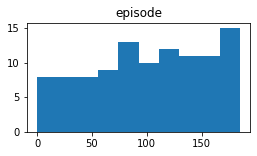

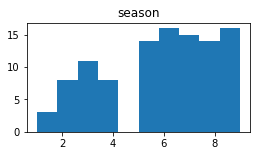

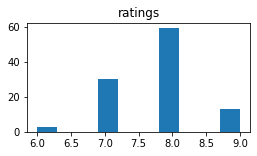

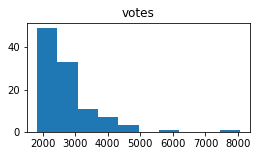

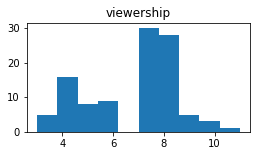

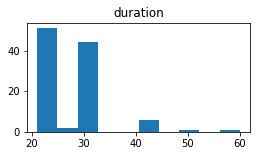

In [18]:
# what is the distribution of each variable
for col in train.columns:
    plt.figure(figsize=(4,2))
    plt.hist(train[col])
    plt.title(col)
    plt.show()

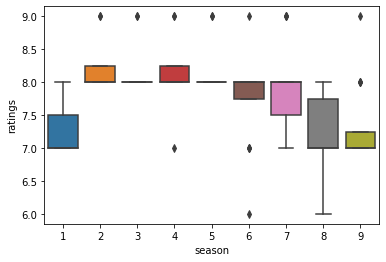

In [23]:
sns.boxplot(train.season, train.ratings)

plt.show()

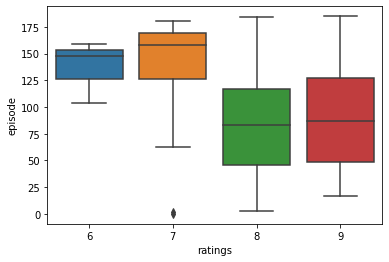

In [20]:
sns.boxplot(train.ratings, train.episode)

plt.show()

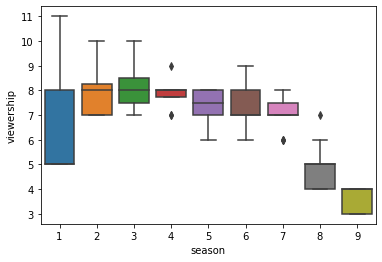

In [22]:
sns.boxplot(train.season, train.viewership)

plt.show()

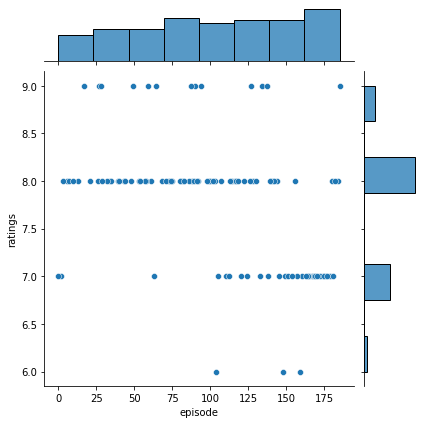

In [26]:
sns.jointplot(x="episode", y="ratings", data=train)
plt.xlabel("Episode")
plt.ylabel("Rating")
plt.show()

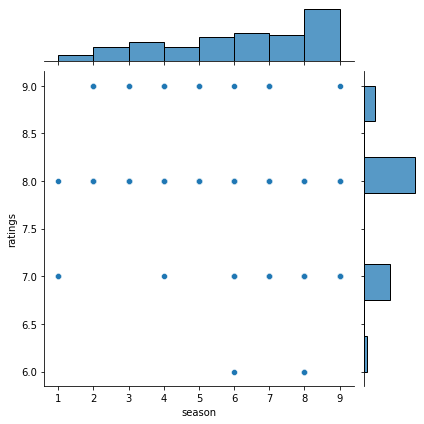

In [27]:
sns.jointplot(x="season", y="ratings", data=train)
plt.xlabel("Episode")
plt.ylabel("Rating")
plt.show()

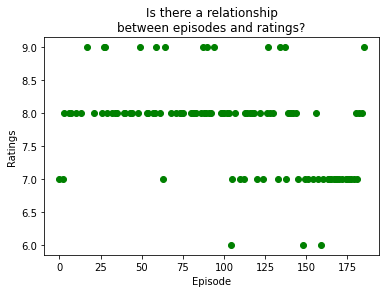

In [30]:
# plot age by spending_score
plt.scatter(train.episode, train.ratings, color='green')
plt.xlabel("Episode")
plt.ylabel("Ratings")
plt.title("Is there a relationship\nbetween episodes and ratings?")
plt.show()

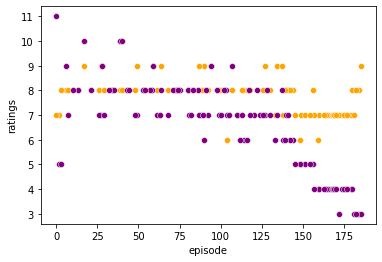

In [36]:
sns.scatterplot(x='episode', y='ratings',
                data=train, color='orange')

sns.scatterplot(x='episode', y='viewership',
                data=train, 
                color='purple')

plt.show()

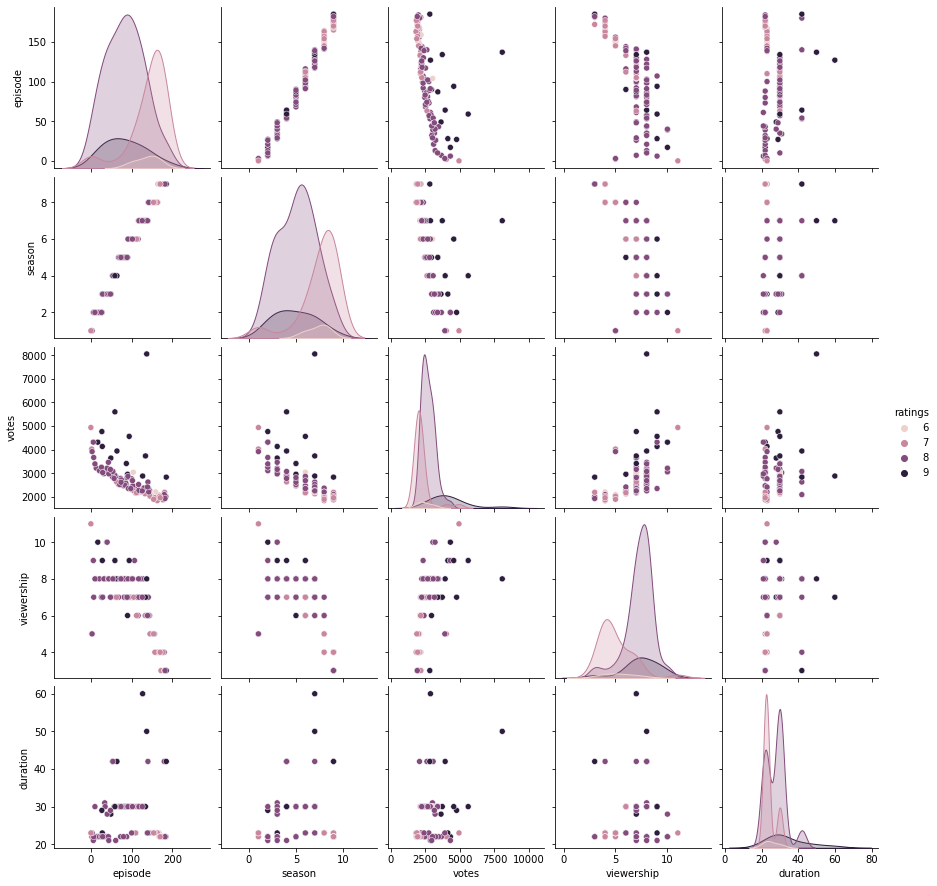

In [37]:
sns.pairplot(train, hue='ratings')
plt.show()